In [2]:
%matplotlib inline
import sys, os
sys.path.append('../')


import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import string
import re
import pandas as pd
import time
from IPython.display import clear_output

# Physics inspired generative grammar

Generating "language" using ferromagnetic ising model.

Not only want to convert to binary but compare to all bases

Best would be to find "binary" (spikes) representation of words in the brain

How to represent text in binary so that the hamming distance between two sentences in a different language is near 0?
- First would have to make them same length
- Need to break down words into their most basic constituents.  For example it's not so obvious for two seemingly similar words.  "Hello" vs "Bonjour" directly yields no obvious similarities, but if we instead group those words by their synonyms (which can be phrases), we find "good day" in english.  And "Bonjour" when broken down becomes "Bon Jour" which means "Good day".  So breaking down suggests that words consist of the most basic elements that all languages share.  
    - Parse through all languages and find those with the closest levenshtein distance.  These will probably be the most basic elements of language.
   
Categories of basic elements: 
   - Valence ('good', 'bad')
   - Time of day ('day', 'night')
   - Cardinal directions (tricky, 'up' and 'arriba' not similar)
   - 
    
    
Other:

- Arnold cat map but for binary strings: how does it change when you shift by one, two etc
- Compare vertical, horizontal, and across time binary strings
- How do words change as you change temperature, as well as what n gram
    
    
Bottom up approach needs more fine tuning, for top down, need to look into HMM probably and learn about n grams.

In [42]:
class Ising():
    ''' Simulating the Ising model '''    
    
    def __init__(self, size = 64, temp=.4, run_time = 1001, speed = .01):
        self.size = size
        self.temp = temp
        self.run_time = run_time
        self.speed = speed #video speed; kind of maxes out at .01 but seems slower than that
        
    ## monte carlo moves    
    def mcmove(self, config, N, beta):
        ''' This is to execute the monte carlo moves using 
        Metropolis algorithm such that detailed
        balance condition is satisified'''
        for i in range(N):
            for j in range(N):            
                    a = np.random.randint(0, N)
                    b = np.random.randint(0, N)
                    s =  config[a, b]
                    nb = config[(a+1)%N,b] + config[a,(b+1)%N] + config[(a-1)%N,b] + config[a,(b-1)%N]
                    cost = 2*s*nb
                    if cost < 0:
                        s *= -1
                    elif rand() < np.exp(-cost*beta):
                        s *= -1
                    config[a, b] = s
        return config
    
    def simulate(self, frame_mode = False, video_mode = False):   
        ''' This module simulates the Ising model'''
        N, temp = self.size, self.temp # Initialse the lattice
        config = 2*np.random.randint(2, size=(N,N))-1
        f = plt.figure(figsize=(15, 15), dpi=80);    
        
        msrmnt = self.run_time
        raster = []
        for i in range(msrmnt):
            config = self.mcmove(config, N, 1.0/temp)
            raster.append(config.flatten())
            if frame_mode == True:
                if i == 0:
                    self.configPlot(f, config, 0, N, 1);
                elif i == 1:       
                    self.configPlot(f, config, i, N, 2);
                elif i == int(.004*msrmnt):       
                    self.configPlot(f, config, i, N, 3);
                elif i == int(.032*msrmnt):      
                    self.configPlot(f, config, i, N, 4);
                elif i == int(.1*msrmnt):     
                    self.configPlot(f, config, i, N, 5);
                elif i == msrmnt -1:    
                    self.configPlot(f, config, i, N, 6);
                    
            elif video_mode == True:
                plt.figure()
                self.configPlot(f, config, i, N, 1)
                plt.show()
                time.sleep(self.speed)
                clear_output(wait=True)
            
        plt.show() 
        
        raster_df = pd.DataFrame(data = np.array(raster))
        raster_df[raster_df==-1]=0
        return raster_df

    def configPlot(self, f, config, i, N, n_ = None, subplots = True):
        ''' This modules plts the configuration once passed to it along with time etc '''
        X, Y = np.meshgrid(range(N), range(N))
        if subplots == True:
            sp =  f.add_subplot(3, 3, n_ )  
            plt.setp(sp.get_yticklabels(), visible=False)
            plt.setp(sp.get_xticklabels(), visible=False)      
        plt.pcolormesh(X, Y, config, cmap=plt.cm.RdBu);
        plt.title('Time=%d'%i); plt.axis('tight')    
    #plt.show()

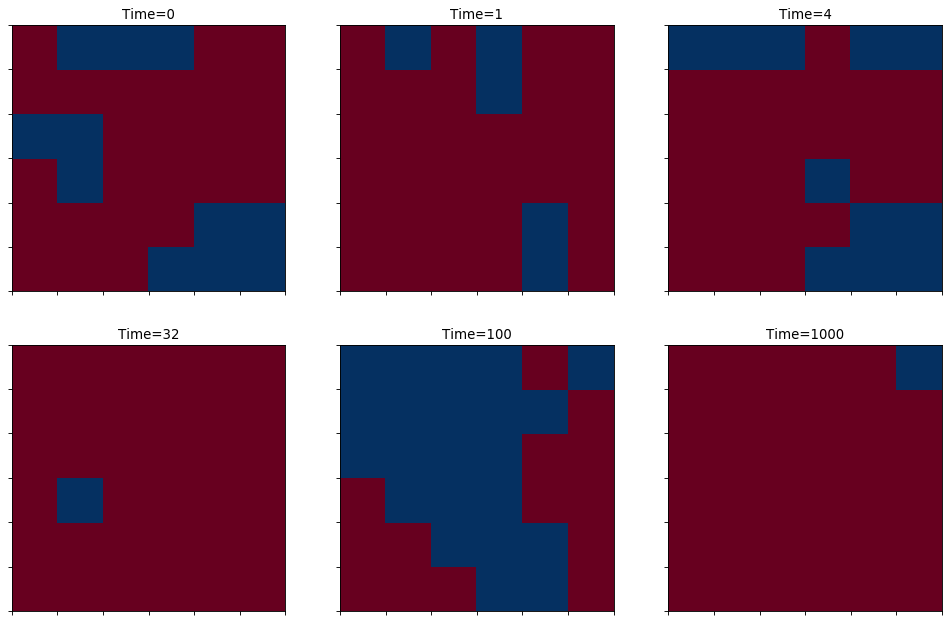

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,0,0,0,1,1,1,0,0,0,0,...,0,0,1,1,0,1,1,1,1,1
1,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,1,1,1,0
2,0,0,0,1,1,1,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
3,0,0,0,1,1,1,0,0,0,0,...,0,0,1,0,0,0,1,1,1,0
4,0,0,0,1,1,1,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
998,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [56]:
rm = Ising(size = 7, temp = 2.26918531421)
test = rm.simulate(frame_mode = True)
test

In [122]:
tape = np.array(test)
stop_ind = list(np.arange(7,50, 7))

all_bstr = []
for f in range(len(tape)): #1001 frames long
    sentence = tape[f] #49 bits long
    prev_ind = 0
    for i in stop_ind:
        bin_str = sentence[prev_ind:i]
        bin_str = [str(n) for n in bin_str]
        prev_ind = i
        all_bstr.append("0" + ''.join(bin_str))  

In [183]:
all_nums = [int(s,2) for s in all_bstr]

all_str = [chr(int(s,2)) for s in all_bstr]
#all_str = [''.join(filter(lambda x: x in string.printable, s)) for s in all_str]
all_str = [re.sub(r"[^A-Za-z]+", '', s) for s in all_str]

In [185]:
''.join(all_str)

'AAawoodaODFGGGGGGGcfgfBAqqbgqqCoooeggmAaAaqaIIpiCBppTxqpxxyyxpXppAaxqDBgacpQqaPPaAMyPAyxpyAADAAEEAEePPoMPcpaaacaSivRDCAQxXlhxXyzsxgAACapPpXaxFBphaaasriMLOGpaDAAGEDBApppDDhAAAAAhpLpAAAAAALhpDGepgcCwwcoscacoGssGoodOgcwSwsookkwwyssookgzoyxzdxxlwIxtoowoogOwwWwwGwwwgswwqsssyywxxwwWGSgwwwcwoswwycxokocgyoowowwwgwssoWwowssosxxzwwwoWwkowwswoOyooOWnowwwqwwvwgtOwtOOyggooqqgyyxyyqpqswqdvouyyyoyOggwwwwwwOooyoayAssooomcIwgooOwOoowowwwowoooooOogwwwOtwgoouuauWqswsGcgwgOwxwoooggwwwwwwssswywcSwwwwsswsxsqqsAsxyyqAyyYqqxGgcfggCpGcaAAQqQqQqyxXHXxOxxxxHxppyayiAapFI'

This is the language of the gods

In [133]:
def bin_to_base(binary, base):
    return int(str(binary),base)

x = ['{0:08b}'.format(i) for i in range(100)]
y = list(range(2, 37)) 
z = [bin_to_base() ]

Now converting just to numbers to get a different sense of distribution, why is there a jump at 4700?  And how to explain the distribution of numbers?

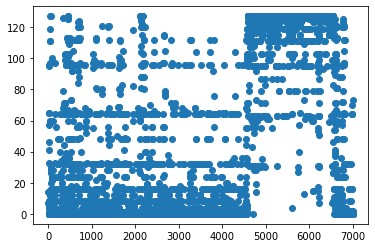

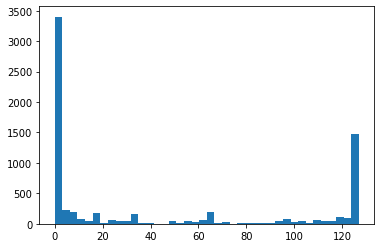

In [121]:
plt.figure()
plt.scatter(range(len(all_nums)), all_nums); plt.show()
plt.figure()
plt.hist(all_nums, 40); plt.show()

In [18]:
def words_to_binary(word):
    """Converts hex representation into binary"""
    return ' '.join(format(ord(x), 'b') for x in word)

In [30]:
def hamming_distance(string1, string2):
    dist_counter = 0
    for n in range(len(string1)):
        if string1[n] != string2[n]:
            dist_counter += 1
    return dist_counter

def levenshtein(seq1, seq2):
    # from https://stackabuse.com/levenshtein-distance-and-text-similarity-in-python/#:~:text=The%20Levenshtein%20Distance,-This%20method%20was&text=The%20distance%20value%20describes%20the,strings%20with%20an%20unequal%20length.
    size_x = len(seq1) + 1
    size_y = len(seq2) + 1
    matrix = np.zeros ((size_x, size_y))
    for x in range(size_x):
        matrix [x, 0] = x
    for y in range(size_y):
        matrix [0, y] = y

    for x in range(1, size_x):
        for y in range(1, size_y):
            if seq1[x-1] == seq2[y-1]:
                matrix [x,y] = min(
                    matrix[x-1, y] + 1,
                    matrix[x-1, y-1],
                    matrix[x, y-1] + 1
                )
            else:
                matrix [x,y] = min(
                    matrix[x-1,y] + 1,
                    matrix[x-1,y-1] + 1,
                    matrix[x,y-1] + 1
                )
    #print (matrix)
    return (matrix[size_x - 1, size_y - 1])

In [15]:
s = words_to_binary("hello world")
s

'1101000 1100101 1101100 1101100 1101111 100000 1110111 1101111 1110010 1101100 1100100'

In [19]:
print(words_to_binary("hello"))
print()
print(words_to_binary("bonjour"))

1101000 1100101 1101100 1101100 1101111

1100010 1101111 1101110 1101010 1101111 1110101 1110010


In [39]:
levenshtein(words_to_binary("hello"),words_to_binary("bonjour"))

21.0